# EDGAR FILING - ANALYTICS

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data files and concatenate both files


In [2]:
import os
os.chdir("D:\Education\Data Science\Files")

In [ ]:
CF = pd.read_table("./CashFlowData.dsv",delimiter='|',low_memory=False)
CF.head(2)

In [3]:
CF.dtypes

cik            int64
sic          float64
countryba     object
stprba        object
cityba        object
zipba         object
fy           float64
fp            object
adsh          object
tag           object
value          int64
dtype: object

In [4]:
BS = pd.read_table("./BalanceSheetData.dsv",delimiter='|',low_memory=False)
BS.head(2)

,cik,sic,countryba,stprba,cityba,zipba,fy,fp,adsh,tag,value
0,2178,5172.0,US,TX,HOUSTON,77027,2015.0,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,12250000
1,2178,5172.0,US,TX,HOUSTON,77027,2015.0,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,11132000


In [5]:
BS.dtypes

cik            int64
sic          float64
countryba     object
stprba        object
cityba        object
zipba         object
fy           float64
fp            object
adsh          object
tag           object
value          int64
dtype: object

In [6]:
BSCF=pd.concat([BS,CF])

In [7]:
len(BSCF.index)

len(BSCF)

31056475

#### Drop nans from data set

In [8]:
BSCF=BSCF.dropna()

In [9]:
BSCF.sic=BSCF.sic.apply(lambda x : int(x))
BSCF.sic=BSCF.sic.apply(lambda x : str(x))



BSCF.sic=BSCF.sic.apply(lamda x : int(x))

In [10]:
BSCF.fy=BSCF.fy.apply(lambda x : int(x))
BSCF.fy=BSCF.fy.apply(lambda x : str(x))

In [11]:
BSCF.cik=BSCF.cik.apply(lambda x : int(x))
BSCF.cik=BSCF.cik.apply(lambda x : str(x))

In [12]:
#BSCF=BSCF.loc[~BSCF.fy.isin(['2018'])]

BSCF=BSCF.loc[~BSCF.fy.isin(['2018'])]


BSCF.loc[~BSCF.fy.isin(['2018'])]

#### Create Credit and Debit Dataframes to analyze further

In [13]:
BSCF_CREDIT=BSCF[BSCF.value>0].reset_index(drop=True)
BSCF_CREDIT.head(2)


#BSCF_CREDIT=BSCF[BSCF.value>0].reset_index(drop=True)

,cik,sic,countryba,stprba,cityba,zipba,fy,fp,adsh,tag,value
0,2178,5172,US,TX,HOUSTON,77027,2015,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,12250000
1,2178,5172,US,TX,HOUSTON,77027,2015,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,11132000


In [14]:
BSCF_CREDIT=BSCF_CREDIT.rename(columns={'value':'Credit'})

BSCF_CREDIT=BSCF_CREDIT.rename(columns={'value':'Credit'})



In [16]:
BSCF_DEBIT=BSCF[BSCF.value<0].reset_index(drop=True)
BSCF_DEBIT.head(2)



BSCF_DEBIT=BSCF[BSCF.value<0].reset_index(drop=True)

,cik,sic,countryba,stprba,cityba,zipba,fy,fp,adsh,tag,value
0,2488,3674,US,CA,SUNNYVALE,94085,2017,Q2,0000002488-17-000156,Assets,-973967296
1,2488,3674,US,CA,SUNNYVALE,94085,2017,Q2,0000002488-17-000156,Assets,-924967296


In [21]:
BSCF_DEBIT=BSCF_DEBIT.rename(columns={'value':'Debit'})

BSCF_DEBIT=BSCF_DEBIT.rename(columns={'value':'Debit'})

In [22]:
BSCF_DEBIT.Debit=BSCF_DEBIT.Debit.apply(lambda x : abs(x))

BSCF_DEBIT.Debit=BSCF.DEBIT.Debit.apply(lambda x : abs(x))

In [25]:
TOTAL_CREDIT=BSCF_CREDIT.groupby(['fy'],as_index=False).sum().sort_values('Credit',ascending=False).reset_index(drop=True)
TOTAL_CREDIT=TOTAL_CREDIT.sort_values(['fy'])
TOTAL_CREDIT=TOTAL_CREDIT.reset_index(drop=True)
TOTAL_CREDIT=TOTAL_CREDIT[['fy','Credit']]
TOTAL_CREDIT.head()




TOTAL_CREDIT=BSCF_CREDIT.groupby(['fy'],as_index=False).sum().sort_values('Credit',ascending=False).reset_index(drop=True)
Total_CREDIT=TOTAL_CREDIT.sort_values(['fy'])
Total_CREDIT=Total_CREDIT.reset_index(drop=True)
Total_CREDIT=Total_CREDIT[['fy','Credit']]
Total_CREDIT.head()

,fy,Credit
0,2008,252816563622
1,2009,79961653391990
2,2010,197344982453450
3,2011,388954137034554
4,2012,473005212787026


In [26]:
TOTAL_DEBIT=BSCF_DEBIT.groupby(['fy'],as_index=False).sum().sort_values('Debit',ascending=False).reset_index(drop=True)
TOTAL_DEBIT=TOTAL_DEBIT.sort_values(['fy'])
TOTAL_DEBIT=TOTAL_DEBIT.reset_index(drop=True)
TOTAL_DEBIT=TOTAL_DEBIT[['fy','Debit']]
TOTAL_DEBIT.head()





TOTAL_DEBIT=BSCF_DEBIT.groupby(['fy'],as_index=FALSE).sum().sort_values('Debit',ascending=False).reset_index(drop=True)
TOTAL_DEBIT=TOTAL_DEBIT.sort_values(['fy'])
TOTAL_DEBIT=TOTAL_DEBIT.reset_index(drop=True)
TOTAL_DEBIT=TOTAL_DEBIT[['fy','Debit']]
TOTAL_DEBIT.head()

,fy,Debit
0,2008,126441900272
1,2009,41386904244233
2,2010,86052427477485
3,2011,140514007466817
4,2012,165048782569649


#### Plot graph to compare credit and debit amounts for every quarter from 2009 to 2018

Text(117.625,0.5,'Amount')

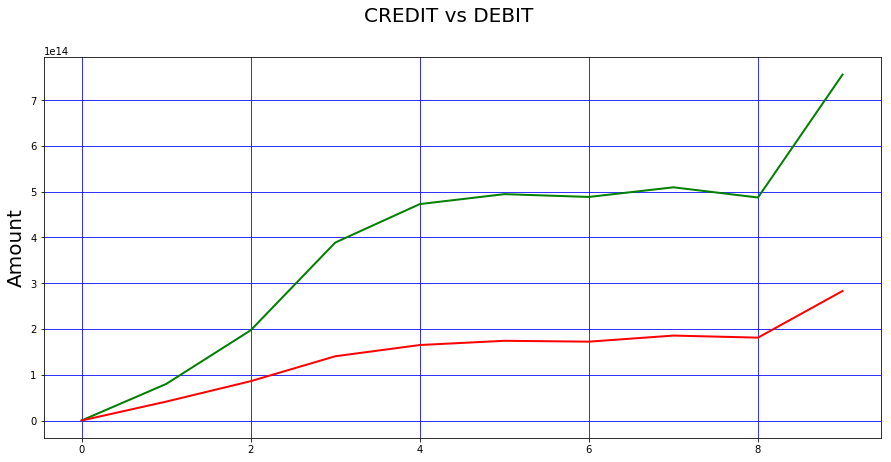

In [362]:
fig = plt.figure(figsize=(15,7))
plt.plot(TOTAL_CREDIT.Credit, color="green", linewidth=2,linestyle='-') 
plt.plot(TOTAL_DEBIT.Debit, color="red",  linewidth=2,linestyle='-')
fig.suptitle('CREDIT vs DEBIT', fontsize=20) 
plt.grid(True,color='blue')
plt.savefig('./Credit_vs_Debit.png')
plt.ylabel('Amount', fontsize=20)  






fig=plt.figure(figsize=(15,7))
fig,ax=plt.subplots(figsize=(15,7))
plt.plot(TOTAL_CREDIT.Credit,color="green",linewidth=2,linestyle="----")
plt.plot(Total_DREDIT.Debit,color="green",linewidth=2,linestyle="---")
fig.suptitle('CREDIT VS DEBIT',fontsize=20)
plt.grid(True,color="blue")
plt.savefig('Credit vs Debit.png')
plt.ylabel('Amount',fontsize=20)





#### Still the graph does not explain us completely the credit-debit relation, let us take ratio for better interpretation

In [28]:
TOTAL_CREDIT.head(2)

,fy,Credit
0,2008,252816563622
1,2009,79961653391990


In [29]:
TOTAL_DEBIT.head(2)

,fy,Debit
0,2008,126441900272
1,2009,41386904244233


#### Create a new dataframe to cross compare credits and debits for specific period

In [30]:
CREDIT_DEBIT=pd.merge(TOTAL_CREDIT,TOTAL_DEBIT,how='inner',on=['fy'])


CREDIT_DEBIT=pd.merge(TOTAL_CREDIT,TOTAL_DEBIT,how='inner',on=['fy'])


In [31]:
CREDIT_DEBIT['CRDR_RATIO']=CREDIT_DEBIT['Credit']/CREDIT_DEBIT['Debit']


CREDIT_DEBIT['CRDR_RATIO']=CREDIT_DEBIT['Credit']/CREDIT_DEBIT['Debit']


In [32]:
CREDIT_DEBIT

,fy,Credit,Debit,CRDR_RATIO
0,2008,252816563622,126441900272,1.999468
1,2009,79961653391990,41386904244233,1.932052
2,2010,197344982453450,86052427477485,2.293311
3,2011,388954137034554,140514007466817,2.768081
4,2012,473005212787026,165048782569649,2.865851
5,2013,494707582246092,174285447589560,2.838490
6,2014,488594086532685,172407642724459,2.833947
7,2015,509635404614989,185676620045199,2.744747
8,2016,487310579873533,181188204056484,2.689527
9,2017,755957438186838,283105611569518,2.670231


#### If CRDR_RATIO is less than 1 for a quarter, then there was a resultant of loss

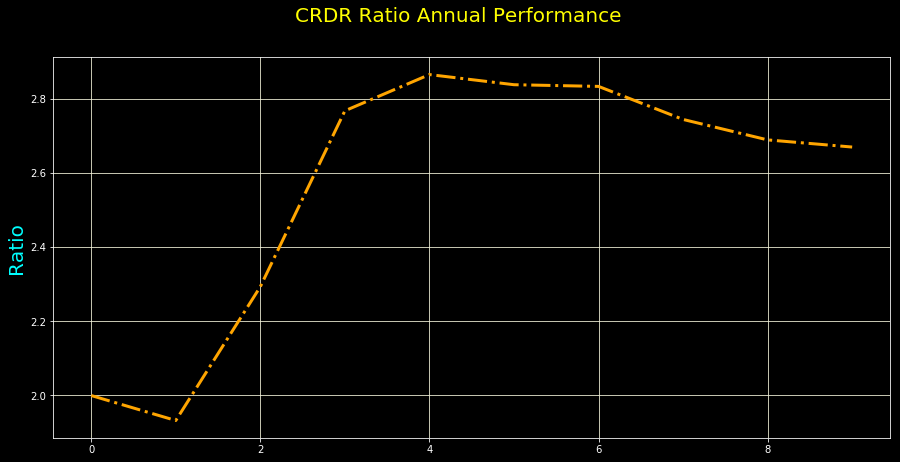

In [364]:
with plt.style.context(('dark_background')):
    fig, ax = plt.subplots(figsize=(15,7))
    fig.canvas.draw()
    ax.plot(CREDIT_DEBIT.CRDR_RATIO, color="orange", linewidth=3,linestyle='-.') 
    fig.suptitle('CRDR Ratio Annual Performance', fontsize=20,color='yellow')
    plt.grid(True,color='beige')
    plt.ylabel('Ratio',fontsize=20,color='cyan') 
    plt.savefig('./Yearly_Credit.png')
    
    
    
with plt.style.context('dark_background'):
    fig,ax=plt.subplots(figsize=(15,7))
    fig.canvas.draw()
    ax.plot(CREDIT_DEBIT.CRDR_RATIO,color='Orange',linewidth=3,linestyle='--?')
    fig.suptitle('CRDR RATIO',fontsize=20,color='yellow')
    plt.grid(True,color='beige')
    plt.ylabel('Ratio',fontsize=20,color='cyan')
    plt.savefig('')

#### Let us now consider region wise distribution

In [34]:
BSCF_CREDIT.head(2)

,cik,sic,countryba,stprba,cityba,zipba,fy,fp,adsh,tag,Credit
0,2178,5172,US,TX,HOUSTON,77027,2015,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,12250000
1,2178,5172,US,TX,HOUSTON,77027,2015,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,11132000


In [35]:
BSCF_DEBIT.head(2)

,cik,sic,countryba,stprba,cityba,zipba,fy,fp,adsh,tag,Debit
0,2488,3674,US,CA,SUNNYVALE,94085,2017,Q2,0000002488-17-000156,Assets,973967296
1,2488,3674,US,CA,SUNNYVALE,94085,2017,Q2,0000002488-17-000156,Assets,924967296


In [36]:
REGION_CREDIT=BSCF_CREDIT.groupby(['stprba'],as_index=False).sum().sort_values('Credit',ascending=False).reset_index(drop=True)
REGION_CREDIT.head()

,stprba,Credit
0,TX,446185882870263
1,CA,434125981456504
2,NY,421788239891634
3,IL,203270579235488
4,OH,179706616388221


In [37]:
REGION_DEBIT=BSCF_DEBIT.groupby(['stprba'],as_index=False).sum().sort_values('Debit',ascending=False).reset_index(drop=True)
REGION_DEBIT.head()

,stprba,Debit
0,NY,182000579850399
1,TX,170870325018246
2,CA,144545203810276
3,IL,80866986898466
4,OH,63410825482777


In [38]:
REGION_DRCR=pd.merge(REGION_CREDIT,REGION_DEBIT,how='inner',on=['stprba'])

In [39]:
REGION_DRCR['DRCR_RATIO']=REGION_DRCR.Credit/REGION_DRCR.Debit

#### Plotting top regions with high credits

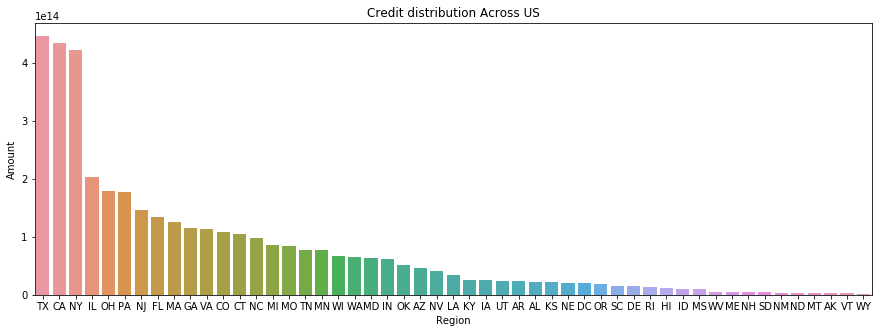

In [359]:
REGION_DRCR=REGION_DRCR.sort_values('Credit',ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,5))
sns.barplot(y='Credit',x='stprba',data=REGION_DRCR)
plt.ylabel('Amount')
plt.xlabel('Region')
plt.title("Credit distribution Across US")
plt.savefig('./regional_credit.png')
plt.show()




#### Plotting top regions with high debits

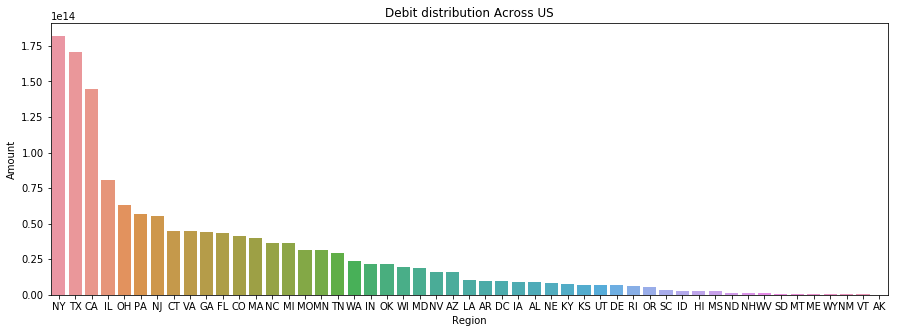

In [41]:
REGION_DRCR=REGION_DRCR.sort_values('Debit',ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,5))
sns.barplot(y='Debit',x='stprba',data=REGION_DRCR)
plt.ylabel('Amount')
plt.xlabel('Region')
plt.title("Debit distribution Across US")
plt.show()

#### Plotting top regions with high CRDR ratio

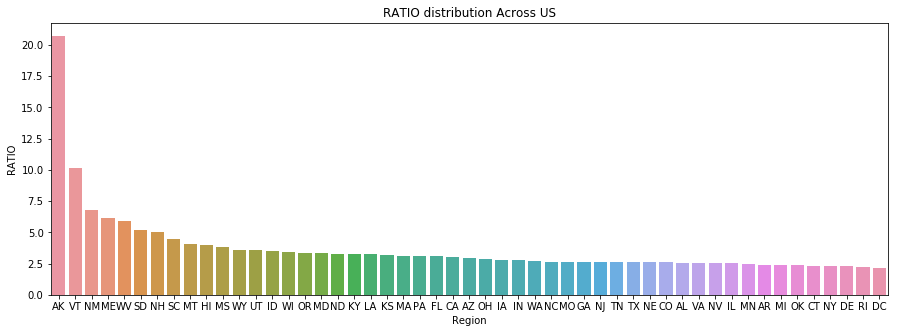

In [358]:
REGION_DRCR=REGION_DRCR.sort_values('DRCR_RATIO',ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,5))
sns.barplot(y='DRCR_RATIO',x='stprba',data=REGION_DRCR)
plt.ylabel('RATIO')
plt.xlabel('Region')
plt.title("RATIO distribution Across US")
plt.savefig('./regional_perf.png')
plt.show()

In [43]:
REGION_DRCR.head(10)

,stprba,Credit,Debit,DRCR_RATIO
0,AK,3253020578848,157030537402,20.715847
1,VT,2701439815264,265728206674,10.166176
2,NM,3885445218354,571396004214,6.799917
3,ME,5014105396547,812691809559,6.169750
4,WV,5578209755830,945349054457,5.900688
5,SD,4711910912781,906679720883,5.196886
6,NH,4994035571947,991648761367,5.036093
7,SC,15599118419011,3513782046983,4.439410
8,MT,3446766722848,842694221292,4.090175
9,HI,10875907113978,2737076999050,3.973548


In [44]:
REGION_DRCR=REGION_DRCR.set_index('stprba')
REGION_DRCR=REGION_DRCR.sort_values('DRCR_RATIO',ascending=False).reset_index(drop=False)

#### Top regions with high % of profit based on CRDR ratio

In [45]:
REGION_DRCR.head(10)

,stprba,Credit,Debit,DRCR_RATIO
0,AK,3253020578848,157030537402,20.715847
1,VT,2701439815264,265728206674,10.166176
2,NM,3885445218354,571396004214,6.799917
3,ME,5014105396547,812691809559,6.169750
4,WV,5578209755830,945349054457,5.900688
5,SD,4711910912781,906679720883,5.196886
6,NH,4994035571947,991648761367,5.036093
7,SC,15599118419011,3513782046983,4.439410
8,MT,3446766722848,842694221292,4.090175
9,HI,10875907113978,2737076999050,3.973548


#### Plotting Credit vs Debits across regions

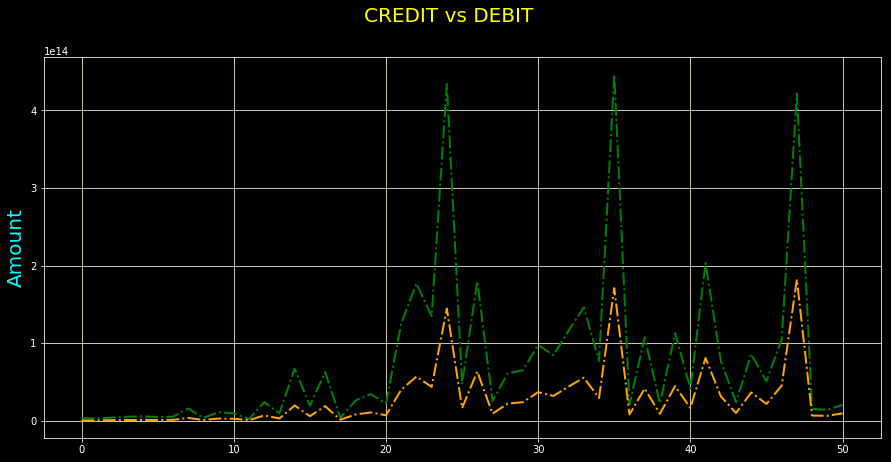

In [46]:
with plt.style.context(('dark_background')):
    plt.figure(figsize=(15,7))
    plt.plot(REGION_DRCR.Credit, color="green", linewidth=2,linestyle='-.') 
    plt.plot(REGION_DRCR.Debit, color="orange",  linewidth=2,linestyle='-.')
    plt.suptitle('CREDIT vs DEBIT', fontsize=20,color='yellow') 
    plt.grid(True,color='beige')
    plt.ylabel('Amount', fontsize=20,color='cyan')  
    
    

In [47]:
REGION_DRCR['Resultant']=REGION_DRCR.Credit-REGION_DRCR.Debit
REGION_DRCR.head(2)

,stprba,Credit,Debit,DRCR_RATIO,Resultant
0,AK,3253020578848,157030537402,20.715847,3095990041446
1,VT,2701439815264,265728206674,10.166176,2435711608590


In [48]:
REGION_DRCR=REGION_DRCR.sort_values('Resultant',ascending=False).reset_index(drop=True)
REGION_DRCR[:7]

,stprba,Credit,Debit,DRCR_RATIO,Resultant
0,CA,434125981456504,144545203810276,3.003393,289580777646228
1,TX,446185882870263,170870325018246,2.611254,275315557852017
2,NY,421788239891634,182000579850399,2.317510,239787660041235
3,IL,203270579235488,80866986898466,2.513641,122403592337022
4,PA,176766265360391,56792174850165,3.112511,119974090510226
5,OH,179706616388221,63410825482777,2.834005,116295790905444
6,FL,134727733376020,43530301946164,3.095033,91197431429856


C:\Users\sdarlapu\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


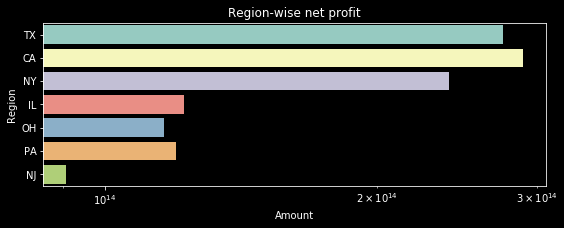

In [369]:
with plt.style.context(('dark_background')):
    plt.figure(figsize=(9,3))
    sns.barplot(x='Resultant',y='stprba',data=REGION_DRCR[:7])
    plt.xscale('log')
    plt.ylabel('Region')
    plt.xlabel('Amount')
    plt.title("Region-wise net profit")
    plt.show()

In [49]:
Total_resultant=sum(REGION_DRCR.Resultant)
Total_resultant

2445931804041103

In [50]:
Top7_resultant=sum(REGION_DRCR.Resultant[:7])
Top7_resultant

1254554900722028

In [51]:
Percent_top7=(Top7_resultant/Total_resultant)*100
Percent_top7

51.29149139192213

#### Top 7 regions get more than 51% revenue in USA
##### CA, TX, NY, PA, OH, IL and FL

In [52]:
BSCF_CREDIT.head(2)

,cik,sic,countryba,stprba,cityba,zipba,fy,fp,adsh,tag,Credit
0,2178,5172,US,TX,HOUSTON,77027,2015,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,12250000
1,2178,5172,US,TX,HOUSTON,77027,2015,Q3,0000002178-15-000048,DeferredIncomeTaxesAndOtherLiabilitiesNoncurrent,11132000


In [53]:
BSCF_DEBIT.head(2)

,cik,sic,countryba,stprba,cityba,zipba,fy,fp,adsh,tag,Debit
0,2488,3674,US,CA,SUNNYVALE,94085,2017,Q2,0000002488-17-000156,Assets,973967296
1,2488,3674,US,CA,SUNNYVALE,94085,2017,Q2,0000002488-17-000156,Assets,924967296


In [54]:
BSCF_SICCIK_CR=BSCF_CREDIT[['sic','cik','fy','Credit']]
BSCF_SICCIK_CR.head(2)

,sic,cik,fy,Credit
0,5172,2178,2015,12250000
1,5172,2178,2015,11132000


In [55]:
BSCF_SICCIK_DR=BSCF_DEBIT[['sic','cik','fy','Debit']]
BSCF_SICCIK_DR.head(2)

,sic,cik,fy,Debit
0,3674,2488,2017,973967296
1,3674,2488,2017,924967296


In [56]:
BSCF_SICCIK_CR=BSCF_SICCIK_CR.groupby(['sic','cik','fy'],as_index=False).sum().sort_values('Credit',ascending=False).reset_index(drop=True)

In [57]:
BSCF_SICCIK_DR=BSCF_SICCIK_DR.groupby(['sic','cik','fy'],as_index=False).sum().sort_values('Debit',ascending=False).reset_index(drop=True)

In [58]:
BSCF_SICCIK=pd.merge(BSCF_SICCIK_CR,BSCF_SICCIK_DR,how='inner',on=['sic','cik','fy'])

In [224]:
BSCF_SICCIK.head(5)

,sic,cik,fy,Credit,Debit
0,4931,1326160,2017,5675164002476,2905475073024
1,4911,92122,2017,3634198402900,1365729543424
2,4911,4904,2017,2917373386116,1501881813504
3,6311,1535929,2013,2729568155482,1745050361280
4,4931,1109357,2017,2696477810045,1652859893056


In [225]:
len(BSCF_SICCIK.index)

49924

In [226]:
BSCF_SIC=BSCF_SICCIK.groupby(['sic','fy'],as_index=False).sum()

In [227]:
BSCF_SIC.head(5)

,sic,fy,Credit,Debit
0,100,2010,81221588124,23354207552
1,100,2011,448346457965,37392740255
2,100,2012,827099114286,157207851871
3,100,2013,619704113640,144645489237
4,100,2014,376426616827,93756572355


In [228]:
BSCF_SIC['CRDR_RATIO']=BSCF_SIC.Credit/BSCF_SIC.Debit

In [229]:
BSCF_SIC['Resultant']=BSCF_SIC.Credit-BSCF_SIC.Debit.reset_index(drop=True)

In [230]:
BSCF_SIC.head(5)

,sic,fy,Credit,Debit,CRDR_RATIO,Resultant
0,100,2010,81221588124,23354207552,3.477814,57867380572
1,100,2011,448346457965,37392740255,11.990201,410953717710
2,100,2012,827099114286,157207851871,5.261182,669891262415
3,100,2013,619704113640,144645489237,4.284296,475058624403
4,100,2014,376426616827,93756572355,4.014936,282670044472


In [231]:
BSCF_SIC.sort_values(['Resultant'],ascending=False).head(10)

,sic,fy,Credit,Debit,CRDR_RATIO,Resultant
2907,6798,2017,66448369997417,24634476913360,2.697373,41813893084057
2601,6022,2017,40805870291572,14335196607039,2.846551,26470673684533
2905,6798,2015,37798196493118,13869189003378,2.725336,23929007489740
2906,6798,2016,37950989247773,14566800222592,2.605307,23384189025181
2904,6798,2014,33099831335216,11857885071498,2.791377,21241946263718
2016,4911,2017,34866129285586,14186912442092,2.457626,20679216843494
2903,6798,2013,29926240354382,10496341553258,2.851112,19429898801124
2592,6021,2017,34577308758677,15440696221190,2.239362,19136612537487
2902,6798,2012,25935271737452,9474959345261,2.737244,16460312392191
2600,6022,2016,22771537722422,7391551946505,3.080752,15379985775917


In [232]:
BSCF_SIC.sort_values(['CRDR_RATIO'],ascending=False).head(10)

,sic,fy,Credit,Debit,CRDR_RATIO,Resultant
3386,8900,2017,581295819,46964,12377.476769,581248855
3385,8900,2015,1625355843,401381,4049.409023,1624954462
427,2452,2013,1766192774,659307,2678.862463,1765533467
2135,5020,2016,2085068523,1423482,1464.766343,2083645041
3124,7600,2010,422532288,511822,825.545381,422020466
2134,5020,2015,2729275719,3585814,761.131425,2725689905
299,2092,2012,819961460,1733409,473.034039,818228051
2256,5099,2014,5861472380,14216101,412.312235,5847256279
2255,5099,2013,5570429271,14203696,392.181674,5556225575
428,2452,2014,8814436213,27172030,324.393732,8787264183


In [233]:
SIC_DICT = pd.read_excel("./SIC_RANGE_NEW.xlsx")
list(SIC_DICT.Division.unique())

['Agriculture, Forestry and Fishing',
 'Mining',
 'Construction',
 'Not in use',
 'Manufacturing',
 'Transportation, Communications, Electric, Gas and Sanitary service',
 'Wholesale Trade',
 'Retail Trade',
 'Finance, Insurance and Real Estate',
 'Services',
 'Public Administration',
 'Nonclassifiable']

In [234]:
SIC_DICT=SIC_DICT.rename(columns={'SIC':'sic'})

In [235]:
BSCF_SIC.sic=BSCF_SIC.sic.apply(lambda x : int(x))

In [236]:
BSCF_SIC=pd.merge(BSCF_SIC,SIC_DICT,how='inner',on=['sic'])

In [237]:
BSCF_SIC.sic=BSCF_SIC.sic.apply(lambda x : str(x))

In [238]:
BSCF_SIC=BSCF_SIC.drop('CRDR_RATIO',axis=1)

In [239]:
BSCF_SIC_DIV=BSCF_SIC.groupby(['Division','fy'],as_index=False).sum().sort_values('Credit',ascending=False).reset_index(drop=True)

In [240]:
BSCF_SIC_DIV['CRDR_IND']=BSCF_SIC_DIV.Credit/BSCF_SIC_DIV.Debit
BSCF_SIC_DIV

,Division,fy,Credit,Debit,Resultant,CRDR_IND
0,"Finance, Insurance and Real Estate",2017,255676725264826,101940386070790,153736339194036,2.508100
1,Manufacturing,2017,193590494033085,68764488801120,124826005231965,2.815268
2,"Finance, Insurance and Real Estate",2015,151300523826170,60311972966284,90988550859886,2.508632
3,"Finance, Insurance and Real Estate",2016,150083237159406,61536253033141,88546984126265,2.438940
4,Manufacturing,2013,141189591877684,46957652841090,94231939036594,3.006743
5,Manufacturing,2014,139943460500954,47359747172604,92583713328350,2.954903
6,Manufacturing,2015,139468737275932,47627965185243,91840772090689,2.928295
7,Manufacturing,2012,137701750574439,45675458896961,92026291677478,3.014786
8,"Finance, Insurance and Real Estate",2014,136144832305527,52624870608860,83519961696667,2.587082
9,"Finance, Insurance and Real Estate",2013,135921892023974,51661702508513,84260189515461,2.630999


In [334]:
list(BSCF_SIC_DIV.Division.unique())

['Finance, Insurance and Real Estate',
 'Manufacturing',
 'Transportation, Communications, Electric, Gas and Sanitary service',
 'Services',
 'Retail Trade',
 'Mining',
 'Wholesale Trade',
 'Construction',
 'Agriculture, Forestry and Fishing',
 'Nonclassifiable']

C:\Users\sdarlapu\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


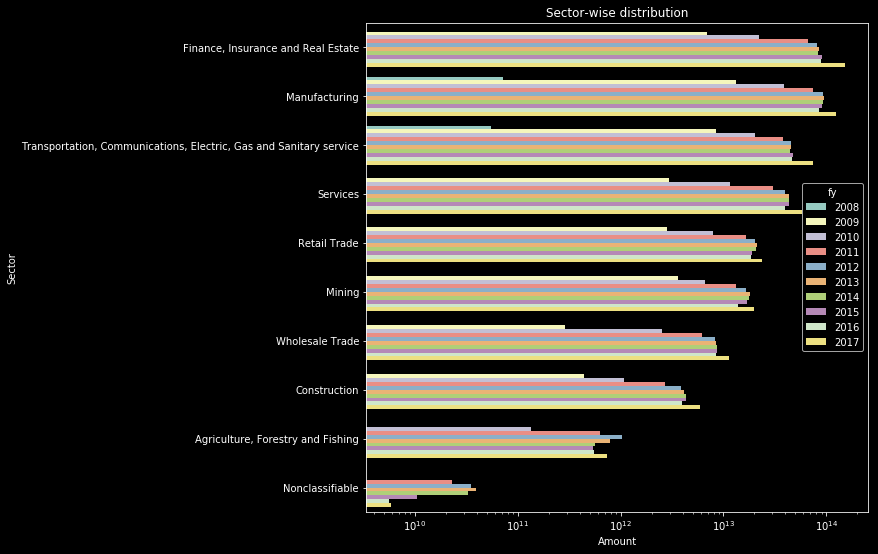

In [357]:
with plt.style.context(('dark_background')):
    plt.figure(figsize=(9,9))
    sns.barplot(x='Resultant',y='Division',data=BSCF_SIC_DIV,hue='fy')
    plt.xscale('log')
    plt.ylabel('Sector')
    plt.xlabel('Amount')
    plt.title("Sector-wise distribution")
    plt.savefig('./sec_analysis.png')
    plt.show()

In [242]:
FIR_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Finance, Insurance and Real Estate'])].sort_values('fy').reset_index(drop=True)
MFC_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Manufacturing'])].sort_values('fy').reset_index(drop=True)
TCE_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Transportation, Communications, Electric, Gas and Sanitary service'])].sort_values('fy').reset_index(drop=True)
SER_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Services'])].sort_values('fy').reset_index(drop=True)
RTR_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Retail Trade'])].sort_values('fy').reset_index(drop=True)
MIN_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Mining'])].sort_values('fy').reset_index(drop=True)
WST_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Wholesale Trade'])].sort_values('fy').reset_index(drop=True)
AFF_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Agriculture, Forestry and Fishing'])].sort_values('fy').reset_index(drop=True)
NCL_SECTOR=BSCF_SIC_DIV.loc[BSCF_SIC_DIV.Division.isin(['Nonclassifiable'])].sort_values('fy').reset_index(drop=True)

In [243]:
FIR_SECTOR=FIR_SECTOR.rename(columns={'Resultant':'FIR_RES','CRDR_IND':'FIR_RATIO'})
MFC_SECTOR=MFC_SECTOR.rename(columns={'Resultant':'MFC_RES','CRDR_IND':'MFC_RATIO'})
TCE_SECTOR=TCE_SECTOR.rename(columns={'Resultant':'TCE_RES','CRDR_IND':'TCE_RATIO'})
SER_SECTOR=SER_SECTOR.rename(columns={'Resultant':'SER_RES','CRDR_IND':'SER_RATIO'})
RTR_SECTOR=RTR_SECTOR.rename(columns={'Resultant':'RTR_RES','CRDR_IND':'RTR_RATIO'})
MIN_SECTOR=MIN_SECTOR.rename(columns={'Resultant':'MIN_RES','CRDR_IND':'MIN_RATIO'})
WST_SECTOR=WST_SECTOR.rename(columns={'Resultant':'WST_RES','CRDR_IND':'WST_RATIO'})
AFF_SECTOR=AFF_SECTOR.rename(columns={'Resultant':'AFF_RES','CRDR_IND':'AFF_RATIO'})
NCL_SECTOR=NCL_SECTOR.rename(columns={'Resultant':'NCL_RES','CRDR_IND':'NCL_RATIO'})

In [259]:
FIR_SECTOR=FIR_SECTOR.loc[~FIR_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
MFC_SECTOR=MFC_SECTOR.loc[~MFC_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
TCE_SECTOR=TCE_SECTOR.loc[~TCE_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
SER_SECTOR=SER_SECTOR.loc[~SER_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
RTR_SECTOR=RTR_SECTOR.loc[~RTR_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
MIN_SECTOR=MIN_SECTOR.loc[~MIN_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
WST_SECTOR=WST_SECTOR.loc[~WST_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
AFF_SECTOR=AFF_SECTOR.loc[~AFF_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)
NCL_SECTOR=NCL_SECTOR.loc[~NCL_SECTOR.fy.isin(['2008','2009','2010'])].reset_index(drop=True)

In [270]:
FIR_SECTOR=FIR_SECTOR[['fy','FIR_RES','FIR_RATIO']]
MFC_SECTOR=MFC_SECTOR[['fy','MFC_RES','MFC_RATIO']]
TCE_SECTOR=TCE_SECTOR[['fy','TCE_RES','TCE_RATIO']]
SER_SECTOR=SER_SECTOR[['fy','SER_RES','SER_RATIO']]
RTR_SECTOR=RTR_SECTOR[['fy','RTR_RES','RTR_RATIO']]
MIN_SECTOR=MIN_SECTOR[['fy','MIN_RES','MIN_RATIO']]
WST_SECTOR=WST_SECTOR[['fy','WST_RES','WST_RATIO']]
AFF_SECTOR=AFF_SECTOR[['fy','AFF_RES','AFF_RATIO']]
NCL_SECTOR=NCL_SECTOR[['fy','NCL_RES','NCL_RATIO']]

In [296]:
BSCF_SIC_DIV.fy.unique()

array(['2017', '2015', '2016', '2013', '2014', '2012', '2011', '2010',
       '2009', '2008'], dtype=object)

In [309]:
TOT_SECTOR=BSCF_SIC_DIV[['fy','Resultant','CRDR_IND','Credit','Debit']]
TOT_SECTOR=TOT_SECTOR.groupby(['fy'],as_index=False).sum().reset_index(drop=True)
TOT_SECTOR=TOT_SECTOR.loc[~TOT_SECTOR.fy.isin(['2008','2009','2010'])]
TOT_SECTOR=TOT_SECTOR.rename(columns={'Resultant':'TOT_RES','CRDR_IND':'TOT_RAT'})

In [320]:
TOT_SECTOR.TOT_RAT=TOT_SECTOR.Credit/TOT_SECTOR.Debit
TOT_SECTOR=TOT_SECTOR[['fy','TOT_RES','TOT_RAT']].reset_index(drop=True)
TOT_SECTOR

,fy,TOT_RES,TOT_RAT
0,2011,248024661764225,2.765124
1,2012,307391241603775,2.862427
2,2013,319876023610269,2.835357
3,2014,315772327041419,2.831545
4,2015,323647700038027,2.743072
5,2016,305656055575285,2.686953
6,2017,472170904329347,2.667826


In [321]:
SEC_CORR=pd.concat([FIR_SECTOR,MFC_SECTOR,TCE_SECTOR,SER_SECTOR,RTR_SECTOR,MIN_SECTOR,WST_SECTOR,AFF_SECTOR,NCL_SECTOR,TOT_SECTOR],axis=1)

In [322]:
SEC_CORR

,fy,FIR_RES,FIR_RATIO,fy,MFC_RES,MFC_RATIO,fy,TCE_RES,TCE_RATIO,fy,...,WST_RATIO,fy,AFF_RES,AFF_RATIO,fy,NCL_RES,NCL_RATIO,fy,TOT_RES,TOT_RAT
0,2011,66231259429819,2.462393,2011,74614284009039,2.973766,2011,37851437825803,2.504483,2011,...,3.781271,2011,622160202921,14.730958,2011,22745713674,17.919594,2011,248024661764225,2.765124
1,2012,80440715099034,2.649779,2012,92026291677478,3.014786,2012,45156898450376,2.499036,2012,...,3.497728,2012,1041329425832,6.631036,2012,34835720970,23.756065,2012,307391241603775,2.862427
2,2013,84260189515461,2.630999,2013,94231939036594,3.006743,2013,45317845153483,2.465453,2013,...,3.269652,2013,793480798446,5.711582,2013,39075874495,11.674421,2013,319876023610269,2.835357
3,2014,83519961696667,2.587082,2014,92583713328350,2.954903,2014,44325216053499,2.470440,2014,...,3.625004,2014,558329555505,5.173001,2014,32765921141,23.363240,2014,315772327041419,2.831545
4,2015,90988550859886,2.508632,2015,91840772090689,2.928295,2015,47957785909038,2.417244,2015,...,3.677471,2015,531971091342,5.382778,2015,10435065083,13.361454,2015,323647700038027,2.743072
5,2016,88546984126265,2.438940,2016,85582367323771,2.894975,2016,46704365219189,2.400755,2016,...,3.619436,2016,546141862821,8.069376,2016,5553464341,11.655040,2016,305656055575285,2.686953
6,2017,153736339194036,2.508100,2017,124826005231965,2.815268,2017,74101436450156,2.389408,2017,...,3.428821,2017,728395168218,9.110905,2017,5759070536,6.675728,2017,472170904329347,2.667826


In [323]:
SEC_CORR.columns

Index(['fy', 'FIR_RES', 'FIR_RATIO', 'fy', 'MFC_RES', 'MFC_RATIO', 'fy',
       'TCE_RES', 'TCE_RATIO', 'fy', 'SER_RES', 'SER_RATIO', 'fy', 'RTR_RES',
       'RTR_RATIO', 'fy', 'MIN_RES', 'MIN_RATIO', 'fy', 'WST_RES', 'WST_RATIO',
       'fy', 'AFF_RES', 'AFF_RATIO', 'fy', 'NCL_RES', 'NCL_RATIO', 'fy',
       'TOT_RES', 'TOT_RAT'],
      dtype='object')

In [326]:
SEC_CORR_RES=SEC_CORR[['FIR_RES','MFC_RES','TCE_RES','SER_RES','RTR_RES','MIN_RES','WST_RES','AFF_RES','NCL_RES','TOT_RES']]

In [328]:
SEC_CORR_RAT=SEC_CORR[['FIR_RATIO','MFC_RATIO','TCE_RATIO','SER_RATIO','RTR_RATIO','MIN_RATIO','WST_RATIO','AFF_RATIO','NCL_RATIO','TOT_RAT']]

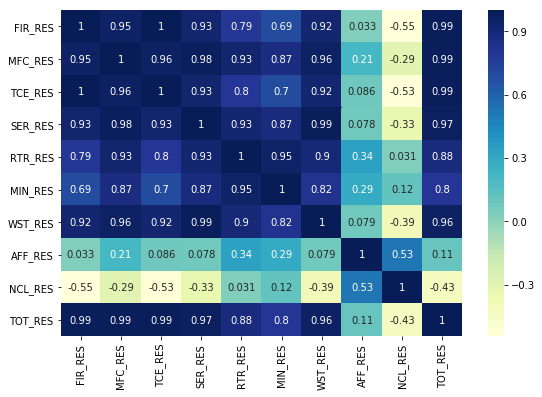

In [354]:
plt.figure(figsize=(9,6))
corr = SEC_CORR_RES.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True)
plt.savefig('./correl_res.png')
plt.show()



corr=SEC_CORR_RES.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True)

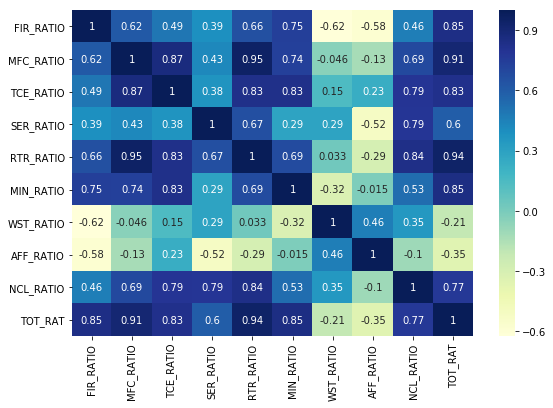

In [363]:
plt.figure(figsize=(9,6))
corr = SEC_CORR_RAT.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True)
plt.savefig('./correl_rat.png',figsize=(9,6))
plt.show()





Major Sectors :
1-  Finance, Insurance and Real Estate,
2-  Manufacturing,
3-  Transportation, Communications, Electric, Gas and Sanitary service,
4-  Services,
5-  Retail Trade,
6-  Mining,
7-  Wholesale Trade,
8-  Construction,
9-  Agriculture, Forestry and Fishing,
10- Nonclassifiable

#### Conclusions
##### ->Wholesale-Trade sector and Agriculture-Forestry-Fishing are negatively correlated with US market
##### ->Manufacturing, Real Estate and Retail Trade are highly influencing US market